<a href="https://colab.research.google.com/github/dzhamalovas/ML/blob/main/ML4_1_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метрики эффективности моделей машинного обучения


## Подготовка данных

In [ ]:
import pandas as pd

data = pd.read_csv('heart.csv')

data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
y = data["output"]
x = data.drop("output", axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Создаём конвейер, который сначала масштабирует данные, а затем обучает модель
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
pipeline.fit(x, y)

# Оцениваем модель
score = pipeline.score(x, y)
print(f'Качество модели: {score}')


Качество модели: 0.8514851485148515


## Разделение выборки


### Простое разделение

In [ ]:
# обучающая
x_train, y_train = x[:200], y[:200]

In [ ]:
x_train.shape, y_train.shape

((200, 13), (200,))

In [ ]:
# тестовая
x_test, y_test = x[200:], y[200:]
x_test.shape, y_test.shape

((103, 13), (103,))

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8553719008264463, 0.8524590163934426)

In [ ]:
# Обучаем модель на обучающей выборке
pipeline.fit(x_train, y_train)

# Оцениваем качество модели на обучающей и тестовой выборках
train_score = pipeline.score(x_train, y_train)
test_score = pipeline.score(x_test, y_test)

print(f'Качество модели на обучающей выборке: {train_score:.2f}')
print(f'Качество модели на тестовой выборке: {test_score:.2f}')

Качество модели на обучающей выборке: 0.85
Качество модели на тестовой выборке: 0.84


### Процентное разделение

In [ ]:
N = int(x.shape[0] * 0.8)

x_train, y_train, x_test, y_test = x[:N], y[:N], x[N:], y[N:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8553719008264463, 0.8524590163934426)

In [ ]:
# Обучаем модель на обучающей выборке
pipeline.fit(x_train, y_train)

# Оцениваем качество модели на обучающей и тестовой выборках
train_score = pipeline.score(x_train, y_train)
test_score = pipeline.score(x_test, y_test)

print(f'Качество модели на обучающей выборке: {train_score:.2f}')
print(f'Качество модели на тестовой выборке: {test_score:.2f}')

Качество модели на обучающей выборке: 0.85
Качество модели на тестовой выборке: 0.84


In [ ]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Случайное разделение

In [ ]:
import numpy as np

In [ ]:
mask = np.array([True] * N + [False] * (y.shape[0] - N))

In [ ]:
from numpy.random import shuffle

shuffle(mask)
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
x_train = x[mask]
x_train.shape

(242, 13)

In [ ]:
x_train, y_train, x_test, y_test = x[mask], y[mask], x[~mask], y[~mask]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

## Разделение выборки

In [ ]:
# 1. Делим данные на обучающую и тестовую выборки
# Берем первые 200 объектов для обучающей выборки
x_train, y_train = x[:200], y[:200]
print("Обучающая выборка:", x_train.shape, y_train.shape)

# Оставшиеся объекты идут в тестовую выборку
x_test, y_test = x[200:], y[200:]
print("Тестовая выборка:", x_test.shape, y_test.shape)

# 2. Обучаем модель логистической регрессии
logistic_test = LogisticRegression(max_iter=1000).fit(x_train, y_train)

# 3. Оцениваем качество модели
train_score = logistic_test.score(x_train, y_train)
test_score = logistic_test.score(x_test, y_test)

print(f"Точность на обучающей выборке: {train_score:.2f}")
print(f"Точность на тестовой выборке: {test_score:.2f}")

Обучающая выборка: (200, 13) (200,)
Тестовая выборка: (103, 13) (103,)
Точность на обучающей выборке: 0.91
Точность на тестовой выборке: 0.52


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 1. Определяем количество объектов для обучающей выборки
N = int(x.shape[0] * 0.8)

# 2. Делим данные на обучающую и тестовую выборки
x_train, y_train = x[:N], y[:N]
x_test, y_test = x[N:], y[N:]

print("Формы выборок:")
print("Обучающая выборка:", x_train.shape, y_train.shape)
print("Тестовая выборка:", x_test.shape, y_test.shape)

# 3. Обучаем модель логистической регрессии
logistic_test = LogisticRegression(max_iter=1000).fit(x_train, y_train)

# 4. Оцениваем качество модели
train_score = logistic_test.score(x_train, y_train)
test_score = logistic_test.score(x_test, y_test)

print(f"Точность на обучающей выборке: {train_score:.2f}")
print(f"Точность на тестовой выборке: {test_score:.2f}")



Формы выборок:
Обучающая выборка: (242, 13) (242,)
Тестовая выборка: (61, 13) (61,)
Точность на обучающей выборке: 0.89
Точность на тестовой выборке: 0.62


In [ ]:
# 5. Выводим последние строки датасета для анализа
print("\nПоследние строки датасета:")
data.tail()


Последние строки датасета:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
from numpy.random import shuffle

shuffle(mask)
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True,

In [ ]:
mask = np.array([True] * N + [False] * (y.shape[0] - N))
np.random.shuffle(mask)

# Разделяем данные на обучающую и тестовую выборки с использованием маски
x_train, y_train = x[mask], y[mask]
x_test, y_test = x[~mask], y[~mask]

print("Формы выборок:")
print("Обучающая выборка:", x_train.shape, y_train.shape)
print("Тестовая выборка:", x_test.shape, y_test.shape)

# Обучаем модель логистической регрессии
logistic_test = LogisticRegression(max_iter=1000).fit(x_train, y_train)

# Оцениваем качество модели
train_score = logistic_test.score(x_train, y_train)
test_score = logistic_test.score(x_test, y_test)

print(f"Точность на обучающей выборке: {train_score:.2f}")
print(f"Точность на тестовой выборке: {test_score:.2f}")


Формы выборок:
Обучающая выборка: (242, 13) (242,)
Тестовая выборка: (61, 13) (61,)
Точность на обучающей выборке: 0.84
Точность на тестовой выборке: 0.90


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Используем встроенную функцию train_test_split для сравнения
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x, y, train_size=0.8, random_state=42)

print("\nФормы выборок с использованием train_test_split:")
print("Обучающая выборка:", x_train_split.shape, y_train_split.shape)
print("Тестовая выборка:", x_test_split.shape, y_test_split.shape)

# Обучаем модель и оцениваем качество с использованием train_test_split
logistic_test_split = LogisticRegression(max_iter=1000).fit(x_train_split, y_train_split)
train_score_split = logistic_test_split.score(x_train_split, y_train_split)
test_score_split = logistic_test_split.score(x_test_split, y_test_split)

print(f"Точность на обучающей выборке (train_test_split): {train_score_split:.2f}")
print(f"Точность на тестовой выборке (train_test_split): {test_score_split:.2f}")


Формы выборок с использованием train_test_split:
Обучающая выборка: (242, 13) (242,)
Тестовая выборка: (61, 13) (61,)
Точность на обучающей выборке (train_test_split): 0.86
Точность на тестовой выборке (train_test_split): 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Построение метрик качества классификации

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
y_test_pred = logistic_test.predict(x_test)
y_train_pred = logistic_test.predict(x_train)

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[ 85,  26],
       [ 12, 119]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[23,  4],
       [ 2, 32]])

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
precision_score(y_test, y_test_pred)

0.8888888888888888

In [ ]:
metrics = pd.DataFrame({
    "Train": [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

metrics

,Train,Test
Accuracy,0.842975,0.901639
Precision,0.820690,0.888889
Recall,0.908397,0.941176
F1,0.862319,0.914286


# Задания для самостоятельного выполнения


## 1. Повторите анализ для других видов моделей. Используйте 5-10 разных классов моделей. Подсчитывайте только метрики на тестовой выборке.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Создаем примерный датасет
x, y = make_classification(n_samples=303, n_features=13, n_classes=2, random_state=42)

# Делим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Список моделей для анализа
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

# Для хранения метрик
metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1"], index=models.keys())

# Обучение и оценка моделей
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Обучаем модель
    y_pred = model.predict(x_test)  # Предсказываем значения для тестовой выборки

    # Подсчет метрик
    metrics.loc[model_name, "Accuracy"] = accuracy_score(y_test, y_pred)
    metrics.loc[model_name, "Precision"] = precision_score(y_test, y_pred)
    metrics.loc[model_name, "Recall"] = recall_score(y_test, y_pred)
    metrics.loc[model_name, "F1"] = f1_score(y_test, y_pred)

# Выводим метрики всех моделей
print(metrics)


                      Accuracy Precision    Recall        F1
Logistic Regression   0.885246  0.885714  0.911765  0.898551
Decision Tree         0.918033  0.914286  0.941176  0.927536
Random Forest         0.934426  0.941176  0.941176  0.941176
SVM                   0.901639  0.911765  0.911765  0.911765
K-Nearest Neighbors   0.819672  0.848485  0.823529  0.835821
Gaussian Naive Bayes  0.885246  0.885714  0.911765  0.898551
Gradient Boosting     0.934426  0.941176  0.941176  0.941176
AdaBoost              0.901639    0.9375  0.882353  0.909091


## 2. Повторите анализ для другого датасета по вашему выбору. Используйте несколько моделей для сравнения. Используйте датасет для множественной классификации.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Загружаем датасет вина
data = load_wine()
x = data.data
y = data.target
class_names = data.target_names

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1"], index=models.keys())

# Обучение и оценка моделей
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Обучаем модель
    y_pred = model.predict(x_test)  # Предсказываем значения для тестовой выборки

    # Подсчет метрик
    metrics.loc[model_name, "Accuracy"] = accuracy_score(y_test, y_pred)
    metrics.loc[model_name, "Precision"] = precision_score(y_test, y_pred, average='weighted')
    metrics.loc[model_name, "Recall"] = recall_score(y_test, y_pred, average='weighted')
    metrics.loc[model_name, "F1"] = f1_score(y_test, y_pred, average='weighted')

# Выводим метрики всех моделей
print(metrics)

# Дополнительно выводим отчет о классификации для модели с наилучшей точностью
best_model = metrics['Accuracy'].idxmax()
print(f"\nBest Model: {best_model}")
best_model_instance = models[best_model]
y_pred_best = best_model_instance.predict(x_test)
print(classification_report(y_test, y_pred_best, target_names=class_names))


                      Accuracy Precision    Recall        F1
Logistic Regression   0.972222  0.974074  0.972222  0.972187
Decision Tree         0.944444  0.951389  0.944444  0.944856
Random Forest              1.0       1.0       1.0       1.0
SVM                   0.805556  0.801058  0.805556  0.802427
K-Nearest Neighbors   0.722222  0.722222  0.722222  0.722222
Gaussian Naive Bayes       1.0       1.0       1.0       1.0
Gradient Boosting     0.944444  0.946296  0.944444  0.943997
AdaBoost              0.916667  0.931373  0.916667  0.917636

Best Model: Random Forest
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 3. Повторите анализ для датасета, предназначенного для решения задачи регрессии. Используйте все метрики качества регрессии, изученные на лекции. Постройте 5 - 10 разных моделей регрессии.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загружаем датасет California Housing
data = fetch_california_housing()
x = data.data
y = data.target

# Делим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Список моделей для анализа
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regression": SVR(),
}

# Для хранения метрик
metrics = pd.DataFrame(columns=["MAE", "MSE", "RMSE", "R^2"], index=models.keys())

# Обучение и оценка моделей
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Обучаем модель
    y_pred = model.predict(x_test)  # Предсказываем значения для тестовой выборки

    # Подсчет метрик
    metrics.loc[model_name, "MAE"] = mean_absolute_error(y_test, y_pred)
    metrics.loc[model_name, "MSE"] = mean_squared_error(y_test, y_pred)
    metrics.loc[model_name, "RMSE"] = np.sqrt(metrics.loc[model_name, "MSE"])
    metrics.loc[model_name, "R^2"] = r2_score(y_test, y_pred)

# Выводим метрики всех моделей
print(metrics)


                                MAE       MSE      RMSE       R^2
Linear Regression            0.5332  0.555892  0.745581  0.575788
Ridge Regression           0.533204  0.555803  0.745522  0.575855
Lasso Regression           0.761578  0.938034  0.968521  0.284167
Decision Tree              0.458574  0.505581  0.711042  0.614181
Random Forest              0.327105  0.254222  0.504204  0.805998
Gradient Boosting          0.371716  0.294079   0.54229  0.775582
AdaBoost                   0.806517  0.847542   0.92062  0.353223
Support Vector Regression  0.859951  1.332012  1.154128 -0.016485


# Контрольные вопросы

## 1. Почему для анализа модели нужно применять несколько метрик эффективности?
Применение нескольких метрик позволяет получить более полное представление о качестве модели. Разные метрики акцентируют внимание на разных аспектах: например, точность (accuracy) может быть высокой, но при этом модель может плохо предсказывать меньшинство классов, что хорошо демонстрирует метрика полноты (recall). Использование нескольких метрик помогает выявить слабые места модели и позволяет принимать более обоснованные решения о ее доработке.

## 2. Зачем для анализа качества модели делить датасет на обучающую и тестовую выборки?
Деление датасета на обучающую и тестовую выборки позволяет избежать переобучения (overfitting). Обучающая выборка используется для тренировки модели, тогда как тестовая позволяет оценить её обобщающую способность на новых, невидимых данных. Это критически важно для понимания, насколько хорошо модель будет работать на реальных данных.

## 3. В чем особенность и область применения каждой метрики качества?
- **Accuracy**: общая точность предсказаний. Применяется, когда классы сбалансированы.
- **Precision**: доля верно предсказанных положительных классов к общему числу предсказанных положительных. Важно в случаях, когда ложноположительные ошибки имеют высокие последствия (например, в медицинской диагностике).
- **Recall**: доля верно предсказанных положительных классов к общему числу фактических положительных. Критично для случаев, когда пропуск положительного случая имеет серьезные последствия (например, в обнаружении заболеваний).
- **F1-score**: гармоническое среднее между precision и recall. Применяется, когда необходимо сбалансировать точность и полноту.
- **MAE/MSE/RMSE**: метрики для регрессии, измеряющие ошибки предсказания. MAE лучше интерпретируется в реальных единицах, а MSE/RMSE акцентируют внимание на больших ошибках.

## 4. Примеры метрик, определяющих выбор наилучшей модели:
- **Точность (accuracy)**: выбор модели для задачи классификации изображений, где классы примерно равномерно распределены.
- **Precision**: в задаче фильтрации спама, где важно минимизировать количество ложных срабатываний.
- **Recall**: в задаче обнаружения рака, где важно выявить как можно больше случаев болезни, даже если это приводит к некоторым ложным срабатываниям.
- **F1-score**: в задачах, где необходимо балансировать между precision и recall, например, в классификации новостей.
- **MAE**: в финансовых прогнозах, где нужно оценить среднюю ошибку в предсказаниях.
- **MSE/RMSE**: в задачах, связанных с предсказанием температуры, где большие ошибки нежелательны.

## 5. В каких случаях нельзя делить выборку случайным образом?
Случайное деление выборки может быть проблематичным, если данные имеют временную зависимость (например, временные ряды), или если данные стратифицированы (например, пациенты в медицинских исследованиях), где важна однородность подвыборок. В таких случаях может быть более целесообразно использовать методы, такие как кросс-валидация.

## 6. Зачем нужен и как использовать отчет о классификации?
Отчет о классификации предоставляет полную картину производительности модели, включая такие метрики, как precision, recall, F1-score и поддержку (support) для каждого класса. Он позволяет быстро идентифицировать сильные и слабые стороны модели и помогает в дальнейшем улучшении. Отчет следует использовать после оценки модели на тестовой выборке, чтобы правильно интерпретировать ее результаты и делать обоснованные выводы о ее применимости.

# Дополнительные задания


## 1. Постройте график зависимости метрик качества классификации из методических указаний от процента выборки, отводимого на тестовую часть.


Logistic Regression - Test Size: 0.10 - Accuracy: 0.60, Precision: 0.20, Recall: 0.24, F1 Score: 0.22
Random Forest - Test Size: 0.10 - Accuracy: 0.64, Precision: 0.28, Recall: 0.29, F1 Score: 0.28
K-Nearest Neighbors - Test Size: 0.10 - Accuracy: 0.47, Precision: 0.22, Recall: 0.21, F1 Score: 0.21
Logistic Regression - Test Size: 0.15 - Accuracy: 0.56, Precision: 0.26, Recall: 0.25, F1 Score: 0.24
Random Forest - Test Size: 0.15 - Accuracy: 0.66, Precision: 0.32, Recall: 0.31, F1 Score: 0.31
K-Nearest Neighbors - Test Size: 0.15 - Accuracy: 0.45, Precision: 0.22, Recall: 0.19, F1 Score: 0.19
Logistic Regression - Test Size: 0.20 - Accuracy: 0.57, Precision: 0.25, Recall: 0.25, F1 Score: 0.24
Random Forest - Test Size: 0.20 - Accuracy: 0.66, Precision: 0.33, Recall: 0.32, F1 Score: 0.32
K-Nearest Neighbors - Test Size: 0.20 - Accuracy: 0.46, Precision: 0.21, Recall: 0.20, F1 Score: 0.19
Logistic Regression - Test Size: 0.25 - Accuracy: 0.56, Precision: 0.25, Recall: 0.25, F1 Score: 0.2

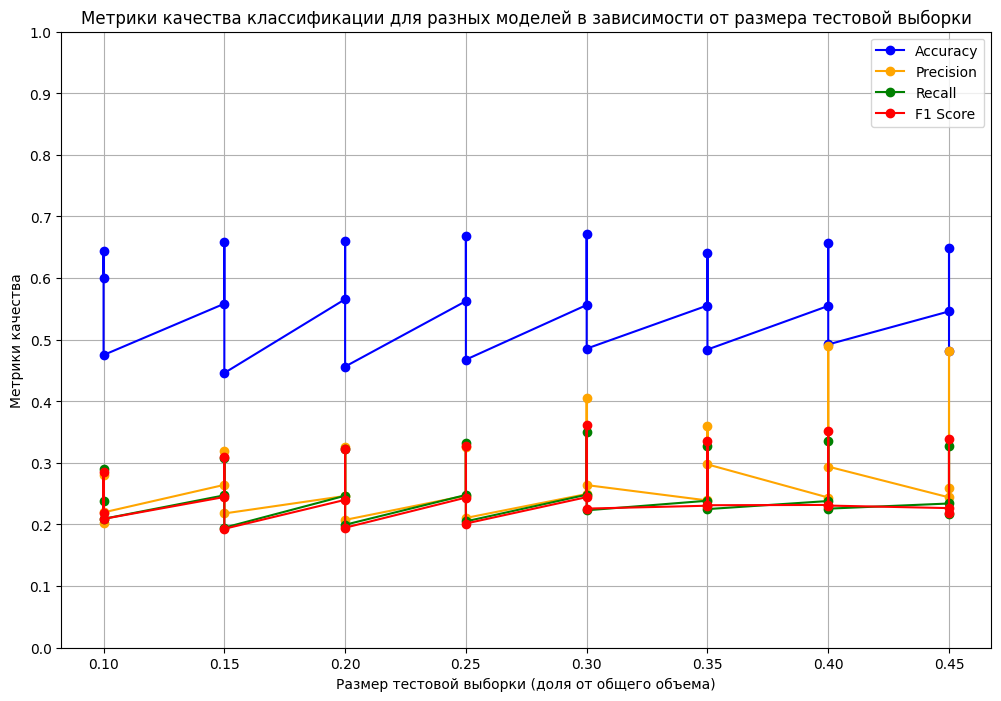

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Загрузим датасет Wine Quality
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Извлекаем признаки и целевую переменную
X = data.drop('quality', axis=1)
y = data['quality']

# Задаем проценты для тестовой выборки
test_sizes = np.arange(0.1, 0.5, 0.05)
metrics = {
    "Test Size": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Вычисляем метрики для разных размеров тестовой выборки
for test_size in test_sizes:
    # Разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Список моделей для обучения
    models = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Random Forest": RandomForestClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier()
    }

    for model_name, model in models.items():
        # Обучаем модель
        model.fit(X_train, y_train)

        # Предсказываем значения
        y_pred = model.predict(X_test)

        # Вычисляем метрики
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

        # Сохраняем метрики
        metrics["Test Size"].append(test_size)
        metrics["Accuracy"].append(acc)
        metrics["Precision"].append(prec)
        metrics["Recall"].append(rec)
        metrics["F1 Score"].append(f1)

        # Печатаем метрики для отладки
        print(f"{model_name} - Test Size: {test_size:.2f} - Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1 Score: {f1:.2f}")

# Создаем датафрейм для метрик
metrics_df = pd.DataFrame(metrics)

# Строим графики
plt.figure(figsize=(12, 8))
plt.plot(metrics_df["Test Size"], metrics_df["Accuracy"], marker='o', label='Accuracy', color='blue')
plt.plot(metrics_df["Test Size"], metrics_df["Precision"], marker='o', label='Precision', color='orange')
plt.plot(metrics_df["Test Size"], metrics_df["Recall"], marker='o', label='Recall', color='green')
plt.plot(metrics_df["Test Size"], metrics_df["F1 Score"], marker='o', label='F1 Score', color='red')

# Добавляем заголовок и подписи
plt.title('Метрики качества классификации для разных моделей в зависимости от размера тестовой выборки')
plt.xlabel('Размер тестовой выборки (доля от общего объема)')
plt.ylabel('Метрики качества')
plt.xticks(test_sizes)  # Подписи для оси X
plt.yticks(np.arange(0, 1.1, 0.1))  # Подписи для оси Y
plt.grid()
plt.legend()
plt.show()


## 2. Создайте универсальную функцию, которая подсчитывает все метрики по любой модели и выводит их в виде таблицы.


In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred, average='macro'),
        "Test Precision": precision_score(y_test, y_test_pred, average='macro'),
        "Train Recall": recall_score(y_train, y_train_pred, average='macro'),
        "Test Recall": recall_score(y_test, y_test_pred, average='macro'),
        "Train F1": f1_score(y_train, y_train_pred, average='macro'),
        "Test F1": f1_score(y_test, y_test_pred, average='macro'),
    }

    return pd.DataFrame(metrics, index=[0])

# Пример использования функции
model = LogisticRegression(max_iter=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
evaluate_model(model, X_train, y_train, X_test, y_test)


,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,0.975,1.0,0.97619,1.0,0.97561,1.0,0.974996,1.0


## 3. Создайте функцию, принимающая на вход датасет, которая проверяет наибольшее количество разных моделей машинного обучения и выдающая датафрейм с таблицей всех метрик.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def evaluate_all_models(X, y):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(),
    }

    metrics_results = []

    for model_name, model in models.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        metrics_df = evaluate_model(model, X_train, y_train, X_test, y_test)
        metrics_df.insert(0, "Model", model_name)
        metrics_results.append(metrics_df)

    return pd.concat(metrics_results, ignore_index=True)

# Пример использования функции
result_df = evaluate_all_models(X, y)
print(result_df)


                    Model  Train Accuracy  Test Accuracy  Train Precision  \
0     Logistic Regression           0.975            1.0          0.97619   
1           Decision Tree           1.000            1.0          1.00000   
2           Random Forest           1.000            1.0          1.00000   
3  Support Vector Machine           0.975            1.0          0.97500   

   Test Precision  Train Recall  Test Recall  Train F1  Test F1  
0             1.0      0.975610          1.0  0.974996      1.0  
1             1.0      1.000000          1.0  1.000000      1.0  
2             1.0      1.000000          1.0  1.000000      1.0  
3             1.0      0.975193          1.0  0.974996      1.0  
